<a href="https://colab.research.google.com/github/elifberkman/deep-learning-prereaquisites/blob/master/numpy-stack-v2/Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PDF and CDF

In [3]:
import numpy as np
import matplotlib.pyplot as plt

So if you're interested in some different distribution like the beta or the gamma you would just do from scipy.stats import beta or from scipy.stats import gamma.

The API for these sub modules is similar.

In [4]:
from scipy.stats import norm

And recall that for the normal distribution the location parameter is the mean and the scale parameter is the standard deviation 

In [ ]:
x = np.linspace(-6, 6, 1000)
fx = norm.pdf(x, loc=0, scale=1)

If you only pass into one argument it plots that thing on the y axis.

But if you pass in two arguments The first argument goes on the x axis and the second argument goes in the y axis.

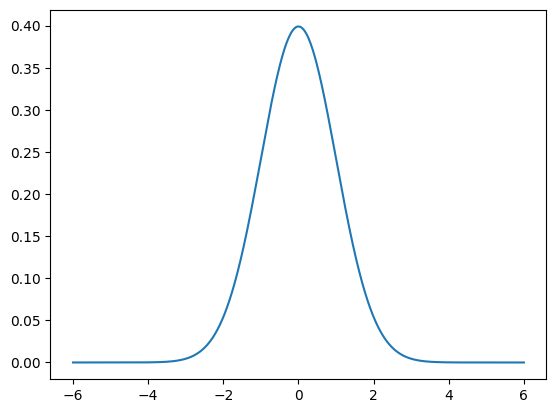

In [ ]:
plt.plot(x, fx);

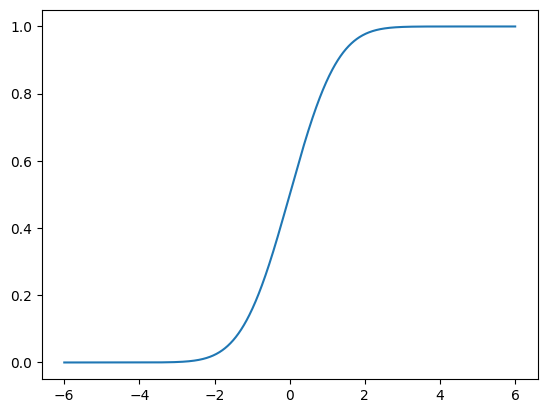

In [ ]:
Fx = norm.cdf(x, loc=0, scale=1)
plt.plot(x, Fx);

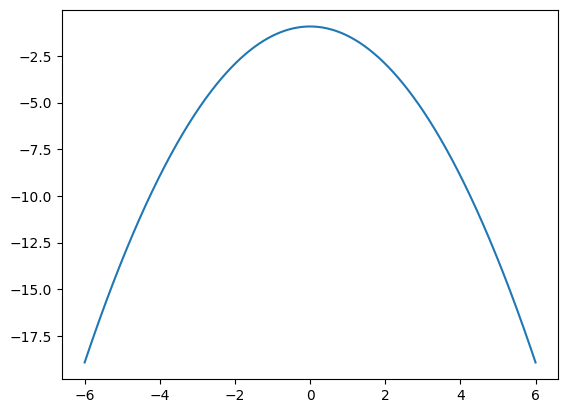

In [ ]:
logfx = norm.logpdf(x, loc=0, scale=1)
plt.plot(x, logfx);

# Convolution

Convolution is a very common operation in many fields such as deep learning signal processing a digital image processing and statistics.

 We will apply convolution to an image to create a blurring filter.

In [5]:
from PIL import Image

In [6]:
!wget https://github.com/lazyprogrammer/machine_learning_examples/raw/master/cnn_class/lena.png

--2023-05-21 18:36:07--  https://github.com/lazyprogrammer/machine_learning_examples/raw/master/cnn_class/lena.png
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/cnn_class/lena.png [following]
--2023-05-21 18:36:07--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/cnn_class/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png.1’

lena.png.1          100%[===================>] 462.73K  --.-KB/s    in 0.005s  

2023-05-21 18:36:07 (88.9 MB/s) - ‘lena.png.1’ saved [

In [ ]:
im = Image.open('lena.png')

I'm going to convert the image to grayscale.

As a side note two dimensional convolution is defined for two dimensional images so we don't want that third a color dimension at least not at this stage.

In [ ]:
gray = np.mean(im, axis=2)

Next we're going to create a two dimensional gaussian filter.

Conveniently this makes use of the PDF we just looked at.

In [ ]:
x = np.linspace(-6, 6, 50)
fx = norm.pdf(x, loc=0, scale=1)

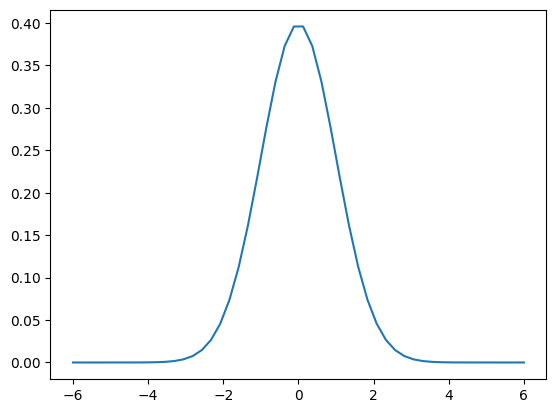

In [ ]:
plt.plot(x, fx);

Now the gaussian filter is basically a two dimensional spherical Gaussian with some constants that we're going to ignore.

A simple way to calculate this is just to do the outer product of F of X with itself


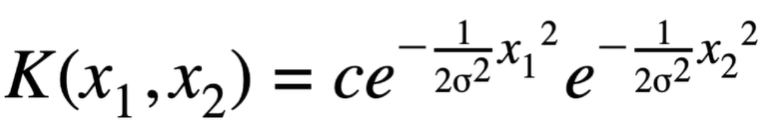

In [ ]:
filt = np.outer(fx, fx)

If we plot a filter as an image it should look like a glowing ball.

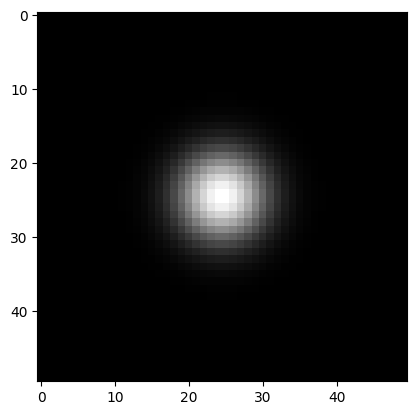

In [ ]:
plt.imshow(filt, cmap='gray');

In [7]:
from scipy.signal import convolve2d

In [ ]:
out = convolve2d(gray, filt)

general form: plt.subplot(#rows, #cols, position)

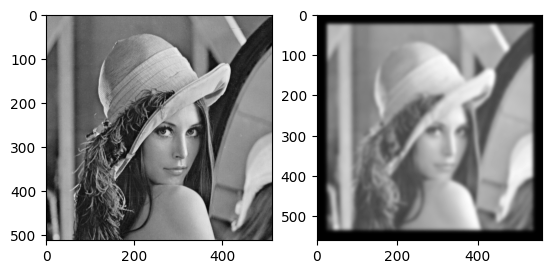

In [ ]:
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(out, cmap='gray');

# Exercise

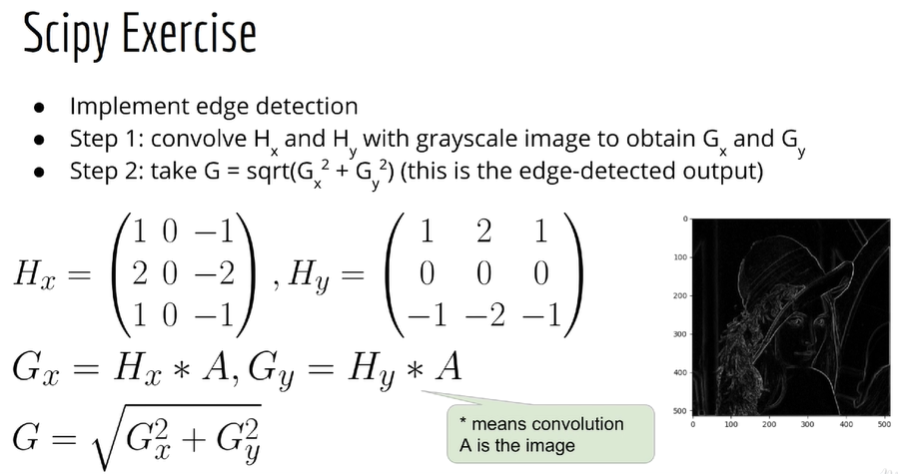

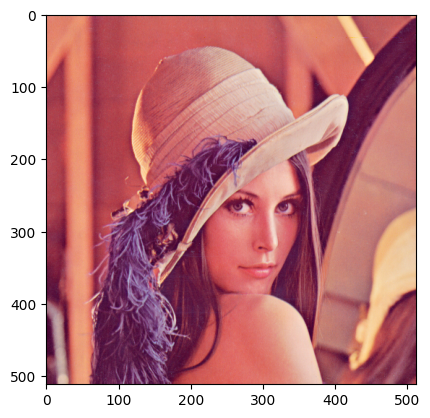

In [8]:
im = Image.open('lena.png')
plt.imshow(im)

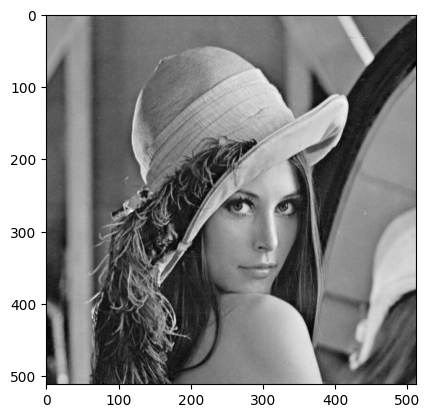

In [9]:
gray = np.mean(im, axis=2)
plt.imshow(gray, cmap='gray');

In [10]:
H_x = np.array([[1,0,-1], [2,0,-2], [1,0,-1]])
H_y = np.array([[1,2,1], [0,0,0], [-1,-2,-1]])

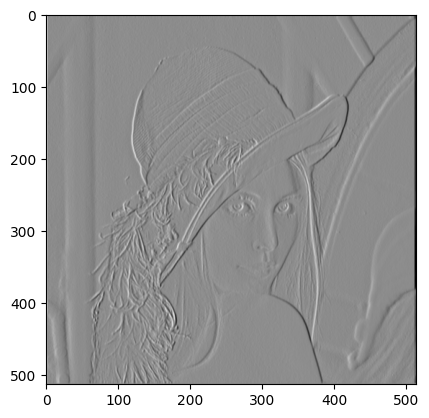

In [11]:
G_x = convolve2d(H_x, gray)
plt.imshow(G_x, cmap='gray');

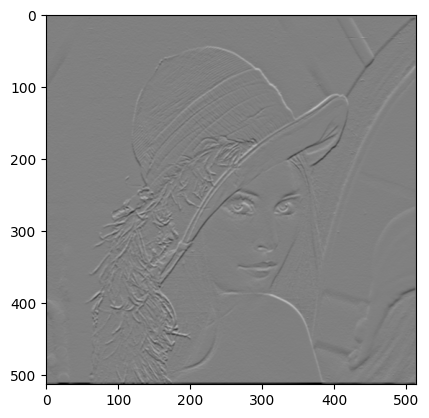

In [12]:
G_y = convolve2d(H_y, gray)
plt.imshow(G_y, cmap='gray');

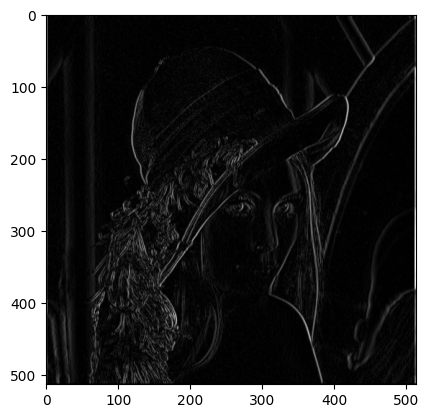

In [13]:
G = np.sqrt(G_x**2, G_y**2)
plt.imshow(G, cmap='gray')